# Chapter 4

Steady states and phase plots in an asymmetric network.

In [1]:
using DifferentialEquations
using ModelingToolkit
using Plots
Plots.default(linewidth=2)

The model for figure 4.1, 4.2, and 4.3.

In [2]:
@independent_variables t
@variables A(t) B(t)
@parameters k1 k2 k3 k4 k5 n
D = Differential(t)

eqs = [
    D(A) ~ k1 / (1 + B^n) - (k3 + k5) * A,
    D(B) ~ k2 + k5 * A - k4 * B
]
@mtkbuild osys = ODESystem(eqs, t)

Model osys:
Equations (2):
  2 standard: see equations(osys)
Unknowns (2): see unknowns(osys)
  A(t)
  B(t)
Parameters (6): see parameters(osys)
  k2
  k1
  n
  k3
  ⋮

## Fig 4.2 A

In [3]:
tend = 1.5
ps1 = Dict(k1 => 20, k2 => 5, k3=> 5, k4 => 5, k5 => 2, n => 4)
prob = ODEProblem(osys, [A => 0.0, B => 0.0], tend, ps1)

u0s = [
    [0.0, 0.0],
    [0.5, 0.6],
    [0.17, 1.1],
    [0.25, 1.9],
    [1.85, 1.7],
]

5-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [0.5, 0.6]
 [0.17, 1.1]
 [0.25, 1.9]
 [1.85, 1.7]

In [4]:
sols = map(u0s) do u0
    solve(remake(prob, u0=u0))
end

5-element Vector{SciMLBase.ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, Nothing, SciMLBase.ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, ModelingToolkit.MTKParameters{Vector{Float64}, Tuple{}, Tuple{}, Tuple{}, Tuple{}}, SciMLBase.ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, ModelingToolkit.MTKParameters{Vector{Float64}, Tuple{}, Tuple{}, Tuple{}, Tuple{}}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, ModelingToolkit.MTKParameters{Vector{Float64}, Tuple{}, Tuple{}, Tuple{}, Tuple{}}, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{Forwa

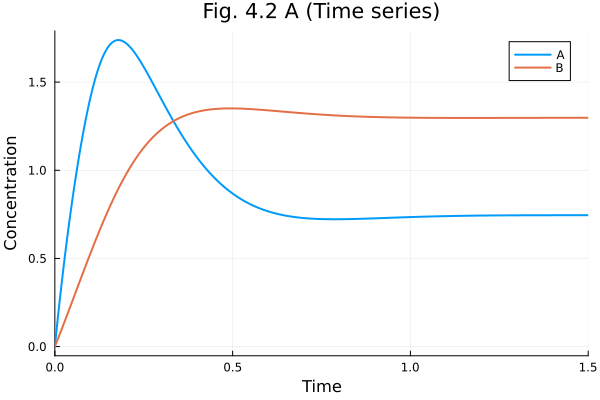

In [5]:
plot(sols[1], xlabel="Time", ylabel="Concentration", title="Fig. 4.2 A (Time series)")

## Fig. 4.2 B (Phase plot)

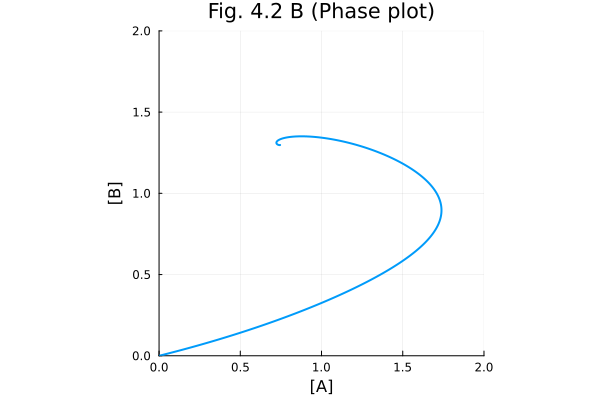

In [6]:
plot(
    sols[1], idxs=(A, B),
    xlabel="[A]", ylabel="[B]",
    aspect_ratio=:equal, legend=nothing,
    title="Fig. 4.2 B (Phase plot)",
    ylims=(0.0, 2.0), xlims=(0.0, 2.0)
)

## Fig. 4.3 A (Multiple time series)

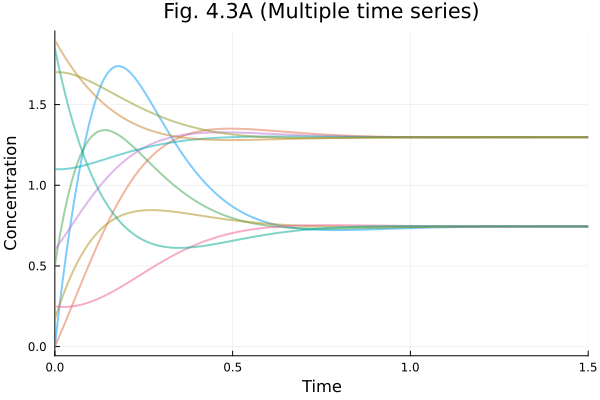

In [7]:
fig = plot(title="Fig. 4.3A (Multiple time series)")

for sol in sols
    plot!(fig, sol, linealpha=0.5, legend=nothing)
end

plot!(fig, xlabel="Time", ylabel="Concentration")

## Fig. 4.3 B (Phase plot)

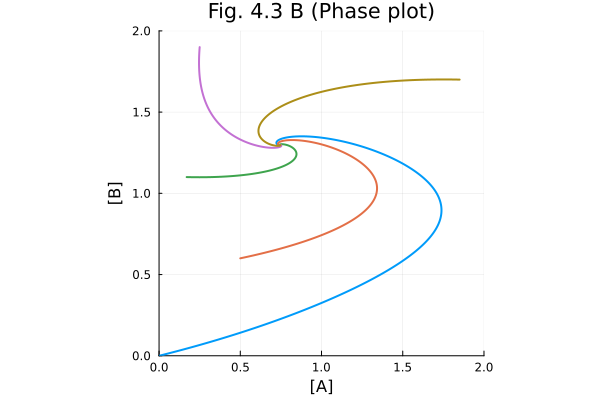

In [8]:
fig = plot(title="Fig. 4.3 B (Phase plot)")

for sol in sols
    plot!(fig, sol, idxs=(A, B), legend=nothing)
end

plot!(fig, xlabel="[A]", ylabel="[B]", xlims=(0.0, 2.0), ylims=(0.0, 2.0), aspect_ratio=:equal)

Let's sketch vector fields in phase plots.

In [9]:
∂F44 = function (x, y; scale=20)
    da, db = prob.f([x, y], prob.p, nothing)
    s = sqrt(hypot(da, db)) * scale
    return (da / s, db / s)
end

#3 (generic function with 1 method)

Grid points

In [10]:
rxy = range(0.0, 2.0, 11)
xx = [x for y in rxy, x in rxy]
yy = [y for y in rxy, x in rxy];

## Figure 4.4A

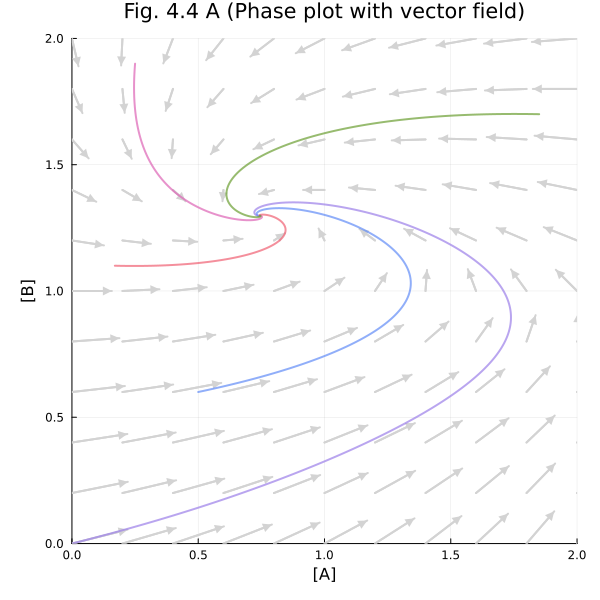

In [11]:
fig = plot(title="Fig. 4.4 A (Phase plot with vector field)")

quiver!(fig, xx, yy, quiver=∂F44, line=(:lightgrey), arrow=(:closed), aspect_ratio=:equal)

for sol in sols
    plot!(fig, sol, idxs=(A, B), linealpha=0.7, legend=nothing)
end

plot!(fig, size=(600, 600), xlims=(rxy[1], rxy[end]), ylims=(rxy[1], rxy[end]), xlabel="[A]", ylabel="[B]")

## Figure 4.5A

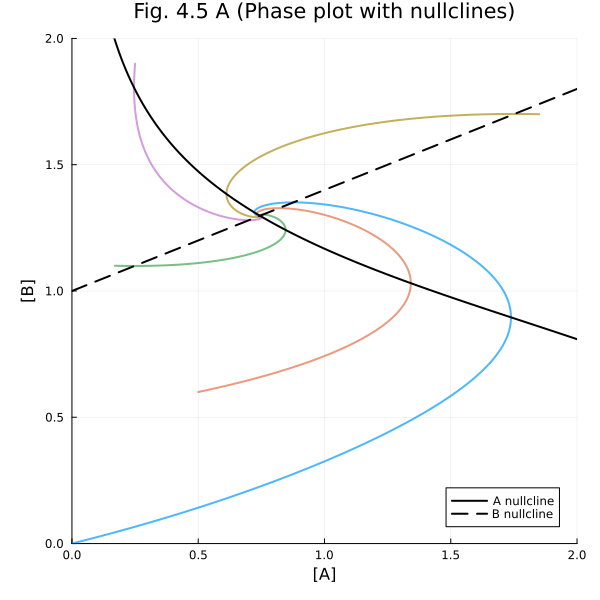

In [12]:
fig = plot(title="Fig. 4.5 A (Phase plot with nullclines)")

# Phase plots
for sol in sols
    plot!(fig, sol, idxs=(A, B), linealpha=0.7, lab=nothing)
end

# nullclines
∂A44 = (x, y) -> prob.f([x, y], prob.p, nothing)[1]
∂B44 = (x, y) -> prob.f([x, y], prob.p, nothing)[2]
contour!(fig, 0:0.01:2, 0:0.01:2, ∂A44, levels=[0], cbar=false, line=(:black))
plot!(fig, Float64[], Float64[], line=(:black), label="A nullcline")  ## Adding a fake line for the legend of A nullcline
contour!(fig, 0:0.01:2, 0:0.01:2, ∂B44, levels=[0], cbar=false, line=(:black, :dash))
plot!(fig, Float64[], Float64[], line=(:black, :dash), label="B nullcline") ## Adding a fake line for the legend of B nullcline
plot!(fig, xlim=(0.0, 2.0), ylim=(0.0, 2.0), legend=:bottomright, size=(600, 600), xlabel="[A]", ylabel="[B]", aspect_ratio=:equal)

## Figure 4.5 B
Vector field

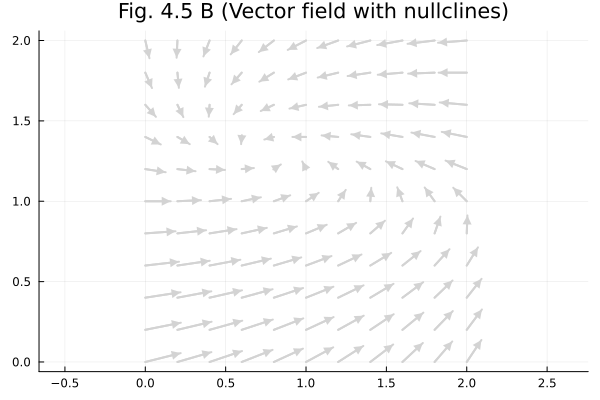

In [13]:
fig = plot(title="Fig. 4.5 B (Vector field with nullclines)")
quiver!(fig, xx, yy, quiver=∂F44, line=(:lightgrey), arrow=(:closed), aspect_ratio=:equal)

Nullclines

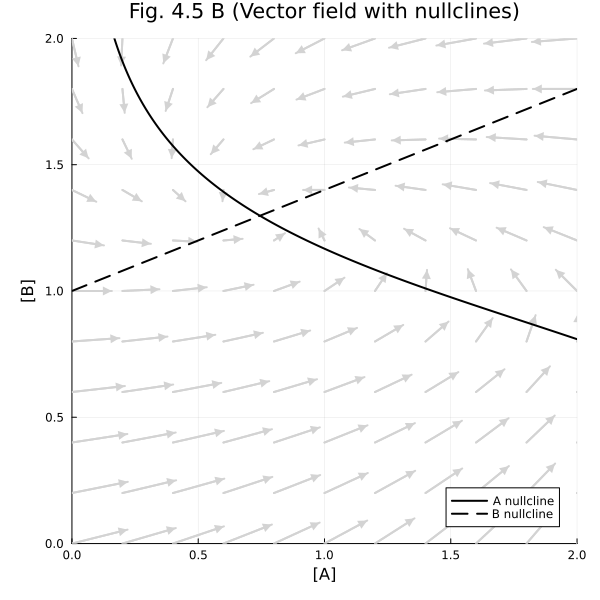

In [14]:
contour!(fig, 0:0.01:2, 0:0.01:2, ∂A44, levels=[0], cbar=false, line=(:black))
plot!(fig, Float64[], Float64[], line=(:black), label="A nullcline")  ## Adding a fake line for the legend of A nullcline
contour!(fig, 0:0.01:2, 0:0.01:2, ∂B44, levels=[0], cbar=false, line=(:black, :dash))
plot!(fig, Float64[], Float64[], line=(:black, :dash), label="B nullcline") ## Adding a fake line for the legend of B nullcline
plot!(fig, xlim=(0.0, 2.0), ylim=(0.0, 2.0), legend=:bottomright, size=(600, 600), xlabel="[A]", ylabel="[B]")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*